[1.47466e-16, 2.21454e-16, 3.54852e-16, 2.96247e-16, 0.0, 4.46429e-16, 1.98971e-16, 1.79638e-16, 3.27753e-16, 1.50794e-16, 1.39775e-16, 1.30375e-16, 1.22274e-16, 2.30455e-16, 0.0, 2.07198e-16, 1.97519e-16, 5.66647e-16, 0.0, 0.0, 0.0, 0.0, 1.57009e-16, 0.0, 0.0, 1.44089e-16, 1.40507e-16, 0.0, 2.68468e-16, 0.0, 0.0, 0.0, 0.0, 1.227e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 1.14623e-16, 0.0, 1.13024e-16, 0.0, 0.0, 1.11517e-16, 1.11242e-16, 1.11077e-16, 0.0, 1.11077e-16, 1.11242e-16, 1.11517e-16, 0.0, 0.0, 1.13024e-16, 0.0, 1.14623e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 1.227e-16, 0.0, 0.0, 0.0, 0.0, 2.68468e-16, 0.0, 1.40507e-16, 1.44089e-16, 0.0, 0.0, 1.57009e-16, 0.0, 0.0, 0.0, 0.0, 5.66647e-16, 1.97519e-16, 2.07198e-16, 0.0, 2.30455e-16, 1.22274e-16, 1.30375e-16, 1.39775e-16, 1.50794e-16, 3.27753e-16, 1.79638e-16, 1.98971e-16, 4.46429e-16, 0.0, 2.96247e-16, 3.54852e-16, 2.21454e-16, 1.47466e-16][1.03226e-15, 8.85817e-16, 3.54852e-16, 1.48123e-16, 2.54471e-16, 1.11607e-16, 3.97942e-16, 0.0, 1.63876e-16, 1.5

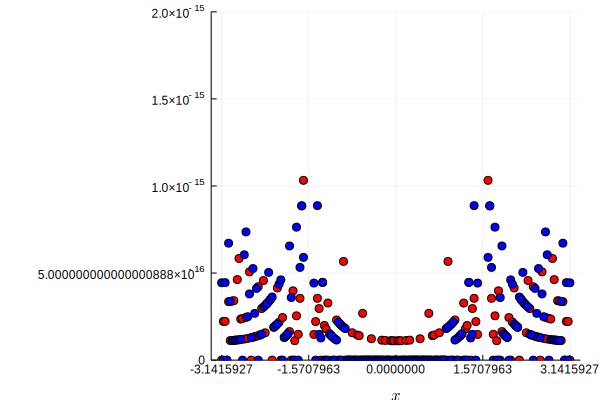

In [3]:
#Pracownia z Analizy Numerycznej (M)
#Zadanie P.1.11
#Mateusz Basiak
#Wrocław, 28.10.2018r.
using Plots
using Printf
include("program.jl")

#Funkcja znajdująca n-ty element szeregu Taylora
#funkcji sin(x) w punkcie x
function element_szeregu_Taylora(x,n)
    licznik = Float64(1.0);
    mianownik = Float64(1.0);
    for i in 1:n
        licznik = licznik*x;
        mianownik = mianownik*Float64(i);
    end
    return licznik/mianownik
end

#Funkcja obliczająca cos(x) za pomocą
#szeregu Taylora, obliczając każdy wyraz osobno.
function cos_Taylor1(x)
    wynik = Float64(1.0);
    j=2;
    wynik1 = wynik;
    while(true)
        t=element_szeregu_Taylora(x,j); #znajdowanie i-tego wyrazu szeregu Taylora
        if(j%4==2) wynik1-=t;
        else wynik1+=t; end
        j=j+2;
        if(wynik1 == wynik)
            return wynik;
        end
        wynik=wynik1;
    end
    return wynik;
end

#Funkcja obliczająca cos(x) za pomocą 1000 pierwszych
#wyrazów szeregu Taylora, korzystając z przenawiasowania działań.
function cos_Taylor2(x)
    wynik = Float64(1.0);
    i = 1000;
    while i>0
        wynik = wynik * x * x;
        mianownik = (Float64(2.0) * Float64(i) - Float64(1.0)) * (Float64(2.0) * Float64(i)); #(2i-1)*(2i)
        wynik = wynik / mianownik;
        wynik = Float64(1.0) - wynik;
        i = i - 1;
    end
    return wynik;
end

#Funkcja obliczająca cos(x) za pomocą iloczynu
function cos_mult(x)
    wynik = Float64(1.0);
    wynik1 = wynik;
    i=1;
    while(true)
        iprim = i - Float64(0.5);
        czynnik = x*x/(Float64(pi)*Float64(pi)*Float64(iprim)*Float64(iprim));
        czynnik = Float64(1.0) - czynnik;
        wynik1 = wynik1 * czynnik;
        if(wynik1 == wynik)
            return wynik;
        end
        wynik=wynik1;
        i = i+1;
    end
end

n = collect(-47.0:47.0);
n1= collect(53.0:100.0);
n2= collect(-100.0:-53.0); 
y=cos_Taylor1.(((pi*n)/Float64(100)));
y1=cos_Taylor1.(((pi*n1)/Float64(100)));
y2=cos_Taylor1.(((pi*n2)/Float64(100)));
for i in 1:95
    y[i]=abs((cos(((pi*(i-48))/Float64(100))) - y[i])/cos(((pi*(i-48))/Float64(100))));
end
for i in 1:48
    y1[i]=abs((cos(((pi*(i-1+53))/Float64(100))) - y1[i])/cos(((pi*(i-1+53))/Float64(100))));
end
for i in 1:48
    y2[i]=abs((cos(((pi*(i-101))/Float64(100))) - y2[i])/cos(((pi*(i-101))/Float64(100))));
end
print(y, y1, y2, "\n")

x=((pi*n)/Float64(100));
x1=((pi*n1)/Float64(100));
x2=((pi*n2)/Float64(100));

plot(x, y, color="red",  seriestype=:scatter, legend=false, xlabel="\$x\$", xlims = (0:pi), xticks = [-pi,-(pi/2),0,(pi/2),(pi)],ylims = (0,2*10^(-15)))
plot!(x1, y1, color="red",  seriestype=:scatter, legend=false, xlabel="\$x\$", xlims = (0:pi), xticks = [-pi,-(pi/2),0,(pi/2),(pi)], ylims = (0,2*10^(-15)))
plot!(x2, y2, color="red",  seriestype=:scatter, legend=false, xlabel="\$x\$", xlims = (0:pi), xticks = [-pi,-(pi/2),0,(pi/2),(pi)], ylims = (0,2*10^(-15)))


n11 = collect(-47.0:47.0);
n12= collect(53.0:100.0);
n23= collect(-100.0:-53.0); 
y11=cos_Taylor2.(((pi*n11)/Float64(100)));
y12=cos_Taylor2.(((pi*n12)/Float64(100)));
y23=cos_Taylor2.(((pi*n23)/Float64(100)));
for i in 1:95
    y11[i]=abs((cos(((pi*(i-48))/Float64(100))) - y11[i])/cos(((pi*(i-48))/Float64(100))));
end
for i in 1:48
    y12[i]=abs((cos(((pi*(i-1+53))/Float64(100))) - y12[i])/cos(((pi*(i-1+53))/Float64(100))));
end
for i in 1:48
    y23[i]=abs((cos(((pi*(i-101))/Float64(100))) - y23[i])/cos(((pi*(i-101))/Float64(100))));
end
print(y11, y12, y23, "\n")

x11=((pi*n)/Float64(100));
x12=((pi*n1)/Float64(100));
x23=((pi*n2)/Float64(100));

plot!(x11, y11, color="blue",  seriestype=:scatter, legend=false, xlabel="\$x\$", xlims = (0:pi), xticks = [-pi,-(pi/2),0,(pi/2),(pi)],ylims = (0,2*10^(-15)))
plot!(x12, y12, color="blue",  seriestype=:scatter, legend=false, xlabel="\$x\$", xlims = (0:pi), xticks = [-pi,-(pi/2),0,(pi/2),(pi)], ylims = (0,2*10^(-15)))
plot!(x23, y23, color="blue",  seriestype=:scatter, legend=false, xlabel="\$x\$", xlims = (0:pi), xticks = [-pi,-(pi/2),0,(pi/2),(pi)], ylims = (0,2*10^(-15)))

In [4]:
savefig("cosinus.png");